In [2]:
import os 
import cv2
from PIL import Image
from patchify import patchify
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

In [3]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

<h1>Data Processing <h1>

In [4]:
root_path = '/dataset/'
base_directory = "dataset/"  # Root directory
sub_directories = ["images", "mask"] 
!ls -lah

total 2.3M
drwxrwxr-x  5 borhan borhan 4.0K Dec 19 16:37 .
drwxrwxr-x  3 borhan borhan 4.0K Nov  6 16:15 ..
-rw-rw-r--  1 borhan borhan 1.5M Dec 20 15:44 data_procesing.ipynb
drwxrwxr-x 10 borhan borhan 4.0K Nov  6 16:54 dataset
drwxrwxr-x  8 borhan borhan 4.0K Dec 19 18:01 .git
-rw-rw-r--  1 borhan borhan   27 Nov  7 11:04 .gitignore
-rw-rw-r--  1 borhan borhan 1.8K Dec 19 16:42 requirements.txt
-rw-rw-r--  1 borhan borhan 823K Dec 19 18:00 Satellite_Imagery_DeepLearning-Base_from_git.ipynb
drwxrwxr-x  6 borhan borhan 4.0K Dec 19 16:43 venv


In [5]:
images = []
masks= []


In [6]:

for path, dirs, files in os.walk(base_directory):
    dir_name = path.split(os.path.sep)[-1]
    print(path)
    if dir_name == "images": 
        for image in enumerate(files): 
            images.append(image)
    if dir_name == "masks": 
        for mask in enumerate(files): 
            masks.append(mask)

print(images)
print(masks)

dataset/
dataset/Tile 5
dataset/Tile 5/masks
dataset/Tile 5/images
dataset/Tile 7
dataset/Tile 7/masks
dataset/Tile 7/images
dataset/Tile 3
dataset/Tile 3/masks
dataset/Tile 3/images
dataset/Tile 6
dataset/Tile 6/masks
dataset/Tile 6/images
dataset/Tile 4
dataset/Tile 4/masks
dataset/Tile 4/images
dataset/Tile 8
dataset/Tile 8/masks
dataset/Tile 8/images
dataset/Tile 1
dataset/Tile 1/masks
dataset/Tile 1/images
dataset/Tile 2
dataset/Tile 2/masks
dataset/Tile 2/images
[(0, 'image_part_007.jpg'), (1, 'image_part_003.jpg'), (2, 'image_part_008.jpg'), (3, 'image_part_001.jpg'), (4, 'image_part_009.jpg'), (5, 'image_part_002.jpg'), (6, 'image_part_005.jpg'), (7, 'image_part_006.jpg'), (8, 'image_part_004.jpg'), (0, 'image_part_007.jpg'), (1, 'image_part_003.jpg'), (2, 'image_part_008.jpg'), (3, 'image_part_001.jpg'), (4, 'image_part_009.jpg'), (5, 'image_part_002.jpg'), (6, 'image_part_005.jpg'), (7, 'image_part_006.jpg'), (8, 'image_part_004.jpg'), (0, 'image_part_007.jpg'), (1, 'image_pa

In [7]:
image_patch_size =  256

In [8]:
image = cv2.imread(f'{base_directory}/Tile 2/images/image_part_001.jpg',1)
image.shape

(544, 509, 3)

In [9]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [10]:
min_max_scalar = MinMaxScaler()

In [11]:
#prepare the all images with patch size
image_dataset = []
mask_dataset = []
for image_type in  ['images', 'masks']:
    if image_type == 'images':
        image_extension = 'jpg'
    elif image_type == 'masks':
        image_extension = 'png'
    for tile_id in range(1,8):
        for image_id in range(1,20):
            image = cv2.imread(f'{base_directory}Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
            if image is not None: 
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                size_x = (image.shape[1]//image_patch_size)*image_patch_size
                size_y = (image.shape[0]//image_patch_size)*image_patch_size
                # print("{} --- {} -- {}".format(image.shape, size_x, size_y))
                image = Image.fromarray(image)
                image = image.crop((0,0, size_x, size_y))
                # print("{} --- {} ".format(image.size[0], image.size[1]))
                image = np.array(image)
                patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
                # print(len(patched_images))
                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        if image_type == 'images':
                            individual_patched_image = patched_images[i,j,:,:]
                            #print(individual_patched_image.shape)
                            individual_patched_image = min_max_scalar.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                            individual_patched_image = individual_patched_image[0]
                            #print(individual_patched_image.shape)
                            image_dataset.append(individual_patched_image)
                        elif image_type == 'masks':
                            individual_patched_mask = patched_images[i,j,:,:]
                            individual_patched_mask = individual_patched_mask[0]
                            mask_dataset.append(individual_patched_mask)
                 

[ WARN:0@2.304] global loadsave.cpp:248 findDecoder imread_('dataset/Tile 1/images/image_part_0010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2.304] global loadsave.cpp:248 findDecoder imread_('dataset/Tile 1/images/image_part_0011.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2.304] global loadsave.cpp:248 findDecoder imread_('dataset/Tile 1/images/image_part_0012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2.305] global loadsave.cpp:248 findDecoder imread_('dataset/Tile 1/images/image_part_0013.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2.305] global loadsave.cpp:248 findDecoder imread_('dataset/Tile 1/images/image_part_0014.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2.305] global loadsave.cpp:248 findDecoder imread_('dataset/Tile 1/images/image_part_0015.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2.305] global loadsave.cpp:248 findDecoder imread_('dataset/Tile 1/

In [12]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [13]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

906


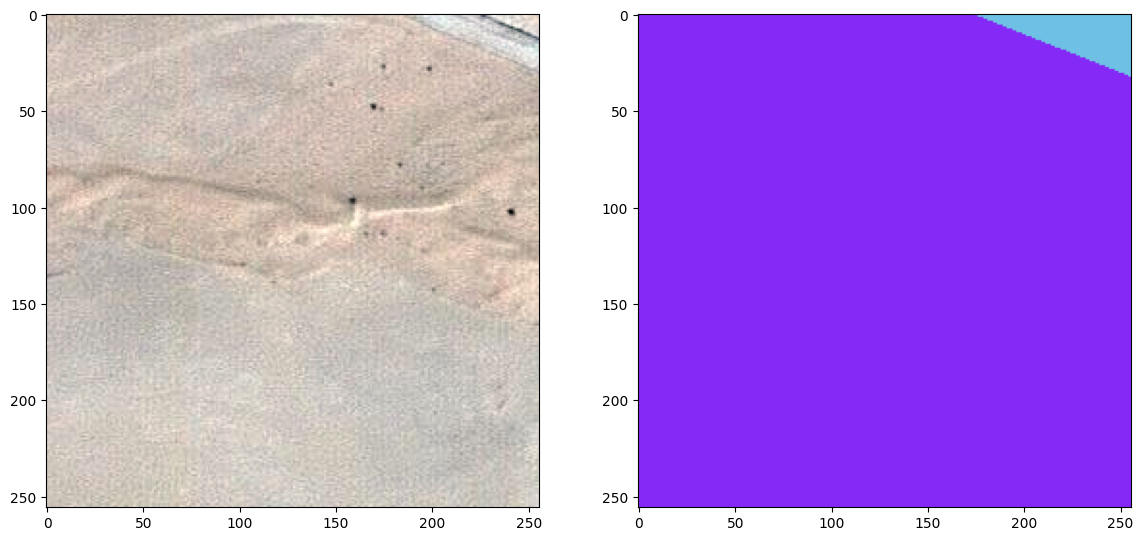

In [14]:
rand_image_id = random.randint(0, len(image_dataset))
print(rand_image_id)
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[rand_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[rand_image_id])

In [15]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building= np.array(tuple(int(class_building[i:i+2], 16) for i in (0, 2, 4)))
print(class_building)


class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land  = np.array(tuple(int(class_land[i:i+2], 16) for i in (0, 2, 4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0, 2, 4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0, 2, 4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0, 2, 4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0, 2, 4)))
print(class_unlabeled)


[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [16]:
label = individual_patched_mask
label

array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]

In [17]:
def rgb_to_label(label): 
    label_segment = np.zeros(label.shape, dtype=np.uint8)
    # print(label)
    label_segment[np.all(label == class_water, axis=-1)] = 0
    label_segment[np.all(label == class_land, axis=-1)] = 1
    label_segment[np.all(label == class_road, axis=-1)] = 2
    label_segment[np.all(label == class_building, axis=-1)] = 3
    label_segment[np.all(label == class_vegetation, axis=-1)] = 4
    label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
    # print(label_segment)
    label_segment = label_segment[:,:,0]
    return label_segment 

In [18]:
print(mask_dataset.shape)

(945, 256, 256, 3)


In [19]:
labels = []
for i in range(mask_dataset.shape[0]): 
    label = rgb_to_label(mask_dataset[i])
    labels.append(label)

In [20]:
labels = np.array(labels)
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [21]:
labels = np.expand_dims(labels, axis=3)
labels[5]

array([[[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]],

       [[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]],

       [[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [22]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


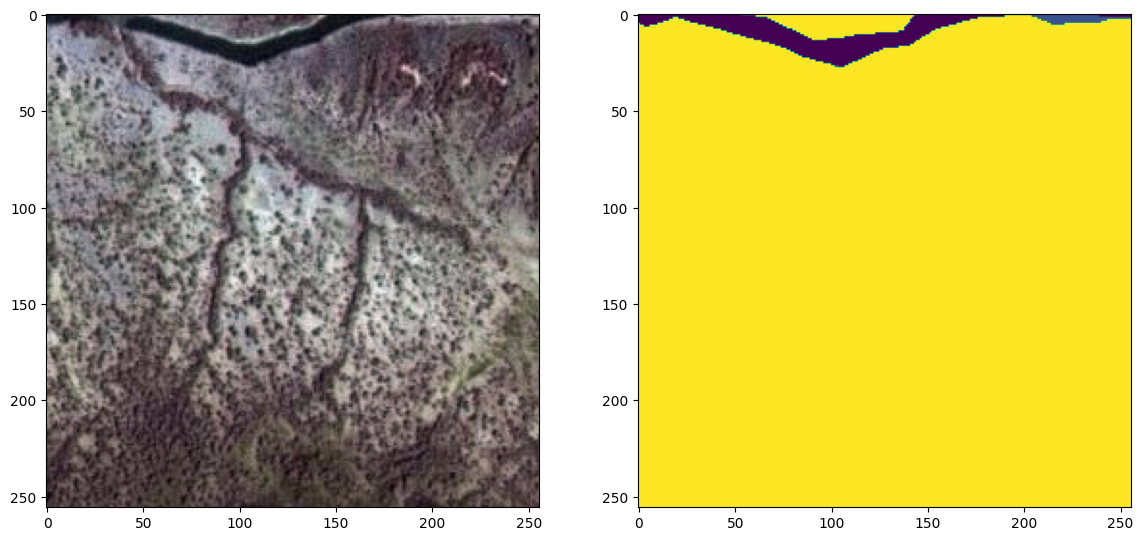

In [23]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [24]:
labels[5][:,:,0]

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [25]:
total_classes = len(np.unique(labels))

In [26]:
total_classes

6

In [27]:
from tensorflow.keras.utils import to_categorical 

2024-12-20 15:45:21.039026: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-20 15:45:21.449438: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-20 15:45:21.450782: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-20 15:45:23.014370: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [28]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [29]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [30]:
master_training_dataset = image_dataset

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [34]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [35]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [36]:
!pip install -U segmentation-models

part 2: Deep learning with sattelite imagery data

In [37]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [38]:
from keras import backend as K

In [39]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


In [40]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [41]:
metrics = ["accuracy", jaccard_coef]

In [42]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [43]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes, 
                          image_height=image_height, 
                          image_width=image_width, 
                          image_channels=image_channels)

In [44]:
model = get_deep_learning_model()

In [45]:
# Please uncomment this line to get model confiuration
# model.get_config()

Generating Loss Function 

. dice loss > Focal Loss > Total Loss <br>
. Total Loss = (Dice loss + ( 1*Focal Loss))

In [46]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [47]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [48]:
dice_loss = sm.losses.DiceLoss(class_weights=weights)

In [49]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [50]:
total_loss = dice_loss + (1 * focal_loss)

Model Compilation

In [51]:
import tensorflow as tf

In [52]:
tf.keras.backend.clear_session()

In [53]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [54]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [55]:
# model_history = model.fit(X_train, y_train,
#                           batch_size=16,
#                           verbose=1,
#                           epochs=100,
#                           validation_data=(X_test, y_test),
#                           shuffle=False)

In [56]:
try:
    model_history = model.fit(
        X_train, y_train,
        batch_size=32,  # Reduced batch size
        epochs=10, #Reduced Epochs for testing
        verbose=1,  # Increased verbosity
        validation_data=(X_test, y_test),
        shuffle=False #Keep shuffle false if that is your intention
    )
    print("Training completed successfully.")
except Exception as e:
    print(f"TensorFlow OutOfRangeError: {e}. Check your data loading and batch size.")
except Exception as e:
    print(f"An error occurred during training: {e}")

2024-12-20 15:45:31.292717: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 631504896 exceeds 10% of free system memory.


Epoch 1/10


2024-12-20 15:45:32.331647: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1263009792 exceeds 10% of free system memory.


26/26 [==============================] - 349s 13s/step - loss: 1.0170 - accuracy: 0.4661 - jaccard_coef: 0.2154 - val_loss: 0.9994 - val_accuracy: 0.5621 - val_jaccard_coef: 0.2269
Epoch 2/10
26/26 [==============================] - 351s 13s/step - loss: 0.9959 - accuracy: 0.6097 - jaccard_coef: 0.2935 - val_loss: 0.9919 - val_accuracy: 0.6557 - val_jaccard_coef: 0.2696
Epoch 3/10
26/26 [==============================] - 352s 14s/step - loss: 0.9879 - accuracy: 0.6598 - jaccard_coef: 0.3463 - val_loss: 0.9824 - val_accuracy: 0.7070 - val_jaccard_coef: 0.3385
Epoch 4/10
26/26 [==============================] - 321s 12s/step - loss: 0.9713 - accuracy: 0.6938 - jaccard_coef: 0.4158 - val_loss: 0.9704 - val_accuracy: 0.6895 - val_jaccard_coef: 0.4263
Epoch 5/10
26/26 [==============================] - 294s 11s/step - loss: 0.9588 - accuracy: 0.7360 - jaccard_coef: 0.4761 - val_loss: 0.9764 - val_accuracy: 0.6746 - val_jaccard_coef: 0.4473
Epoch 6/10
26/26 [==============================] -

In [57]:
history_a = model_history

In [58]:
history_a.history

{'loss': [1.0169795751571655,
  0.9958874583244324,
  0.987922728061676,
  0.971267819404602,
  0.9588207006454468,
  0.9521052837371826,
  0.9498722553253174,
  0.9460673332214355,
  0.9419854879379272,
  0.9409976005554199],
 'accuracy': [0.46612149477005005,
  0.6097307801246643,
  0.6597678661346436,
  0.6938324570655823,
  0.7360329627990723,
  0.7555897235870361,
  0.7564406991004944,
  0.7661731243133545,
  0.7758170366287231,
  0.7789947390556335],
 'jaccard_coef': [0.21540236473083496,
  0.29347673058509827,
  0.34630081057548523,
  0.41575512290000916,
  0.47608593106269836,
  0.5045630931854248,
  0.5124230980873108,
  0.5314552187919617,
  0.5482182502746582,
  0.5510297417640686],
 'val_loss': [0.9994018077850342,
  0.9918605089187622,
  0.9823557734489441,
  0.9704239368438721,
  0.9764009714126587,
  0.9919951558113098,
  0.9756369590759277,
  0.9674796462059021,
  0.9743680357933044,
  0.9736277461051941],
 'val_accuracy': [0.5621102452278137,
  0.6556748151779175,
  0.

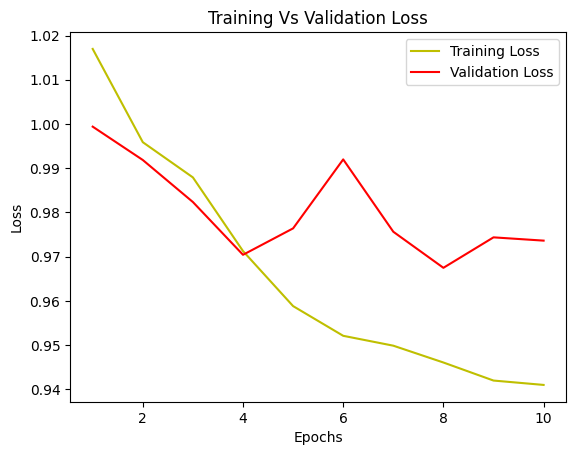

In [59]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

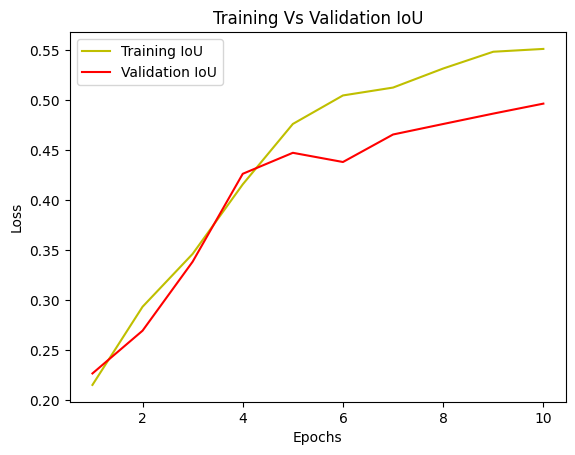

In [60]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [61]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 26}

In [62]:
y_pred = model.predict(X_test)

5/5 [==============================] - 8s 1s/step


In [63]:
len(y_pred)

142

In [64]:
y_pred

array([[[[5.65199628e-02, 3.02610338e-01, 2.85122991e-01,
          3.97506431e-02, 2.65019685e-01, 5.09764142e-02],
         [2.52640285e-02, 3.62051994e-01, 3.09455097e-01,
          1.14362529e-02, 2.73131073e-01, 1.86615158e-02],
         [2.88163405e-02, 2.90617585e-01, 2.51532525e-01,
          1.06410040e-02, 4.02389288e-01, 1.60032026e-02],
         ...,
         [4.01796736e-02, 1.27574220e-01, 2.82322258e-01,
          1.13390246e-02, 5.13511956e-01, 2.50727981e-02],
         [5.30055910e-02, 2.01227129e-01, 2.75221288e-01,
          1.53869353e-02, 4.22344089e-01, 3.28148790e-02],
         [7.83939809e-02, 2.58901149e-01, 2.88812578e-01,
          2.39306595e-02, 2.74006039e-01, 7.59555995e-02]],

        [[2.57203002e-02, 1.83989465e-01, 2.53710389e-01,
          1.89631283e-02, 4.98050928e-01, 1.95656754e-02],
         [1.10178413e-02, 2.17085734e-01, 2.73033142e-01,
          6.33279700e-03, 4.87503707e-01, 5.02679031e-03],
         [1.72565915e-02, 2.60573000e-01, 2.0241

In [66]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [67]:
len(y_pred_argmax)

142

In [68]:
y_pred_argmax

array([[[1, 1, 4, ..., 4, 4, 2],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        ...,
        [4, 4, 0, ..., 0, 0, 0],
        [4, 4, 0, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 2, 1, 1],
        [2, 2, 1, ..., 2, 1, 1],
        [2, 2, 2, ..., 2, 1, 1],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       ...,

       [[4, 4, 4, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [2, 1, 1, ..., 4, 4, 4],
        [4, 2, 1, ..., 4, 4, 4]],

       [[0, 0, 0, ..., 0, 0, 4],
        [0, 0, 0, ..., 0, 4, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [69]:
y_test_argmax = np.argmax(y_test, axis=3)

In [70]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Comparing prediction results
. using test images using mask images and predicted result images..

In [71]:
import random


In [78]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 85ms/step


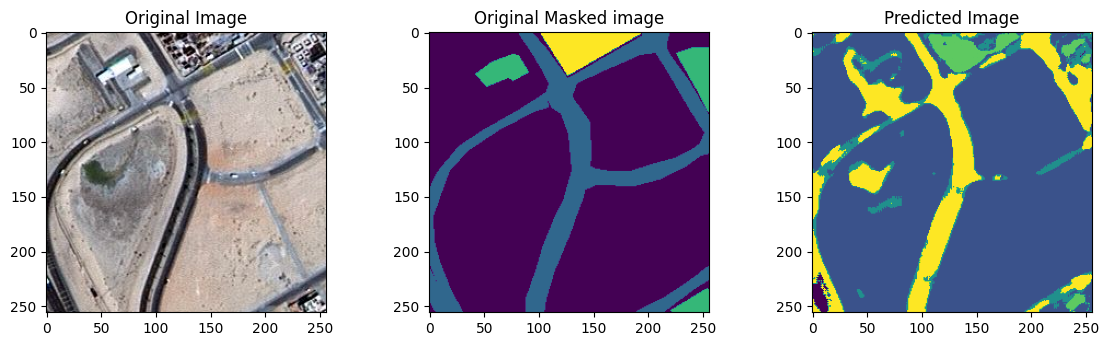

In [79]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


In [74]:
model.save("satellite_segmentation_full.h5")

/home/borhan/Documents/my_project/deep-learning-with-imagery-data/Deep-learning-with-imager-data/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
!ls -lah 

total 25M
drwxrwxr-x  5 borhan borhan 4.0K Dec 20 16:45 .
drwxrwxr-x  3 borhan borhan 4.0K Nov  6 16:15 ..
-rw-rw-r--  1 borhan borhan 1.6M Dec 20 16:45 data_procesing.ipynb
drwxrwxr-x 10 borhan borhan 4.0K Nov  6 16:54 dataset
drwxrwxr-x  8 borhan borhan 4.0K Dec 19 18:01 .git
-rw-rw-r--  1 borhan borhan   27 Nov  7 11:04 .gitignore
-rw-rw-r--  1 borhan borhan 1.8K Dec 19 16:42 requirements.txt
-rw-rw-r--  1 borhan borhan 823K Dec 19 18:00 Satellite_Imagery_DeepLearning-Base_from_git.ipynb
-rw-rw-r--  1 borhan borhan  23M Dec 20 16:45 satellite_segmentation_full.h5
drwxrwxr-x  6 borhan borhan 4.0K Dec 19 16:43 venv
